# Tasks for laboratory assignment 2

In [53]:
# imports section

import pandas as pd
import gensim as gs
import numpy as np
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
nltk.download('punkt_tab')
from wordcloud import WordCloud


from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import gensim.downloader as api



# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Extract data from the json file 

Write a script, that would extract all the the data from the json file and return it in a list of texts for further use in the next tasks

In [54]:
import json

def extract_texts_from_file(file_path):
   
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        
    texts = [item for item in data["texts"]]  # Замініть 'text' на відповідний ключ, якщо він інший
    return texts

texts = extract_texts_from_file('resources/data.json')
print(texts)

['Oppenheimer, directed by Christopher Nolan, delves into the life of J. Robert Oppenheimer, the theoretical physicist who led the development of the atomic bomb. The film explores his moral and emotional struggles.', "Oppenheimer captures the life of the 'father of the atomic bomb' and his internal conflict after the success of the Manhattan Project. The film's complex narrative reflects on the cost of scientific achievement.", 'In Oppenheimer, Cillian Murphy delivers a riveting performance as the conflicted physicist who grapples with the consequences of his groundbreaking work on the atomic bomb, under the weight of global politics and ethics.', 'Oppenheimer is a cinematic exploration of ambition, guilt, and responsibility. Through stunning visuals and a thought-provoking story, Nolan brings the life of the brilliant but haunted physicist to the big screen.', 'Ducks are versatile waterfowl, known for their adaptability in freshwater and coastal habitats. With webbed feet and waterpr

## Process the texts

Write a script, that would process these texts. Processing should include:

- Lowercasing
- Removing Punctuation
- Removing Special Characters and Numbers
- Stemming or Lemmatization
- Handling Abbreviations
- Spelling Correction

In [55]:

def process_texts(texts):
  
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    spell = Speller(lang='en')  # Автокорекція працює для англійської мови
    
    processed_texts = []
    for text in texts:
        text = text.lower()  # Переведення в нижній регістр
        text = ''.join([char for char in text if char not in string.punctuation])  # Видалення пунктуації
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # Видалення спеціальних символів і чисел
        words = word_tokenize(text)  # Токенізація
        
        # Стемінг або лематизація та автокорекція
        words = [spell(word) for word in words]
        words = [stemmer.stem(word) for word in words]  # або замінити на lemmatizer.lemmatize(word)
        
        processed_text = ' '.join(words)
        processed_texts.append(processed_text)
    
    return processed_texts

texts_processed = process_texts(texts)
print(texts_processed)


['oppenheim direct by christoph nolan elv into the life of j robert oppenheim the theoret physicist who led the develop of the atom bomb the film explor hi moral and emot struggl', 'oppenheim captur the life of the father of the atom bomb and hi intern conflict after the success of the manhattan project the film complex narr reflect on the cost of scientif achiev', 'in oppenheim million murphi deliv a rivet perform as the conflict physicist who grape with the consequ of hi groundbreak work on the atom bomb under the weight of global polit and ethic', 'oppenheim is a cinemat explor of ambit guilt and respons through stun visual and a thoughtprovok stori nolan bring the life of the brilliant but haunt physicist to the big screen', 'duck are versatil waterfowl known for their adapt in freshwat and coastal habitat with web feet and waterproof feather they are excel swimmer migrat long distanc to find food and warmer climat', 'the lamp is a spider but it talk yesterday i flew but nobodi not

## Visualize as cloud of words

Visualize the texts as a cloud of words.

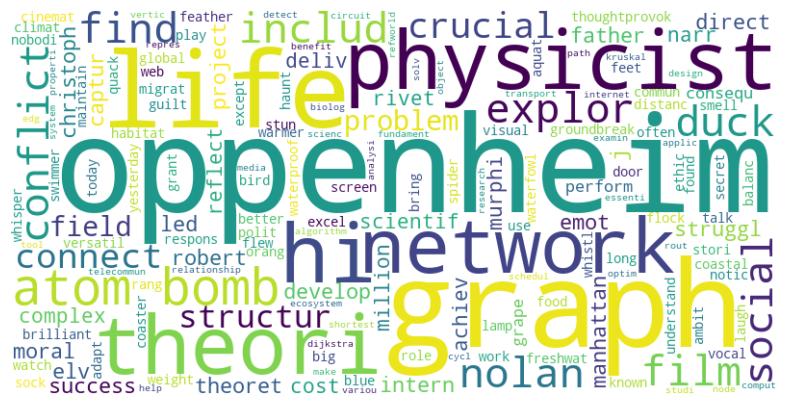

In [56]:
def visualize_texts(texts_processed):
   
    all_text = ' '.join(texts_processed)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

visualize_texts(texts_processed)


## Calculate cosine similarities using TFIDF

Calculate the TFIDF score and cosine similarity between the texts. You may use gensim, write your own script using numpy or use other module. Output the result as a matrix $n\times n$ of cosine similarity scores (where $n$ is the length of texts list).

**Extra credit**: use word2vec word embeddings in vector spaces to get better TFIDF scores by representing each word as a vector.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_tfidf(texts_processed):
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts_processed)
    cosine_matrix = cosine_similarity(tfidf_matrix)
    
    return cosine_matrix

cosine_matrix = calculate_tfidf(texts_processed)
print(cosine_matrix)


[[1.         0.43534076 0.3402057  0.31389463 0.01569266 0.06448977
  0.09227305 0.04382524 0.03886272 0.08388302]
 [0.43534076 1.         0.38652714 0.27099549 0.01412557 0.07948307
  0.13781457 0.05128269 0.04697519 0.12850931]
 [0.3402057  0.38652714 1.         0.18947982 0.05474026 0.05293754
  0.10994815 0.04913131 0.08554306 0.08941859]
 [0.31389463 0.27099549 0.18947982 1.         0.05593608 0.13234228
  0.09582703 0.07514959 0.057011   0.08118741]
 [0.01569266 0.01412557 0.05474026 0.05593608 1.         0.06329182
  0.13824974 0.04215264 0.12090211 0.0263463 ]
 [0.06448977 0.07948307 0.05293754 0.13234228 0.06329182 1.
  0.05885335 0.06160512 0.03297554 0.05622526]
 [0.09227305 0.13781457 0.10994815 0.09582703 0.13824974 0.05885335
  1.         0.0820581  0.11379296 0.11702788]
 [0.04382524 0.05128269 0.04913131 0.07514959 0.04215264 0.06160512
  0.0820581  1.         0.13710227 0.16654135]
 [0.03886272 0.04697519 0.08554306 0.057011   0.12090211 0.03297554
  0.11379296 0.13710

## Visualize data

Visualize the `cosine_matrix` data using matplotlib. Choose your own method of plotting the scores in a way, that the similarity indeces between texts would be instantly visible. Plot data about texts as well (a couple of first words in the document).

*Hint: remember heat maps, aren't they nice for this task?*

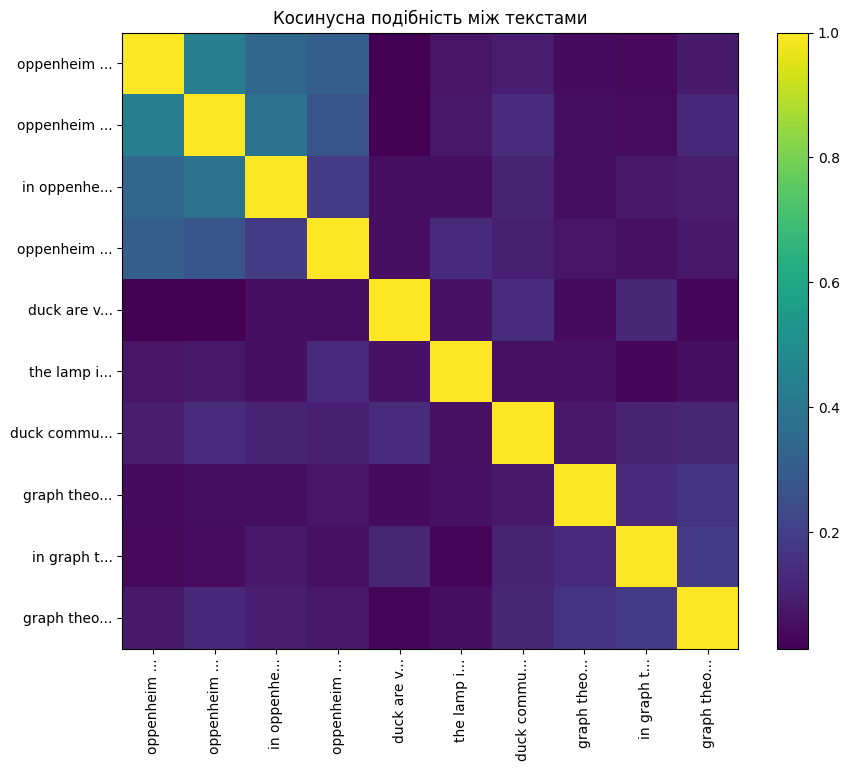

In [58]:
def visualize_data(cosine_matrix, texts_processed):
   
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    
    plt.xticks(range(len(texts_processed)), [text[:10] + '...' for text in texts_processed], rotation=90)
    plt.yticks(range(len(texts_processed)), [text[:10] + '...' for text in texts_processed])
    
    plt.title('Косинусна подібність між текстами')
    plt.show()

visualize_data(cosine_matrix, texts_processed)


## Analyse your own text using TFIDF (or any other method)

Analyse your own text using previous methods. You may use API fetching to get text data, download texts from Kaggle or use any texts you want. Find cosine similarities and visualize them.

Оброблені тексти: ['це перший текст для аналізу', 'другий текст також потрібно обробити та порівняти', 'ще один приклад тексту який може бути проаналізований', 'останній текст для завершення аналізу та візуалізації']


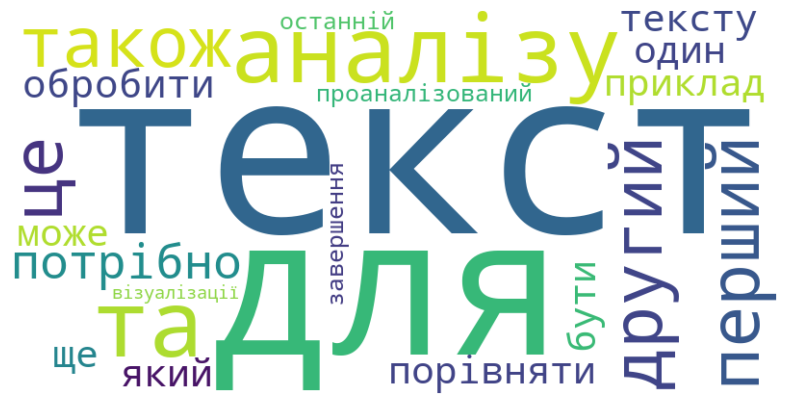

Матриця косинусної подібності:
 [[1.         0.08684153 0.         0.37623863]
 [0.08684153 1.         0.         0.18251495]
 [0.         0.         1.         0.        ]
 [0.37623863 0.18251495 0.         1.        ]]


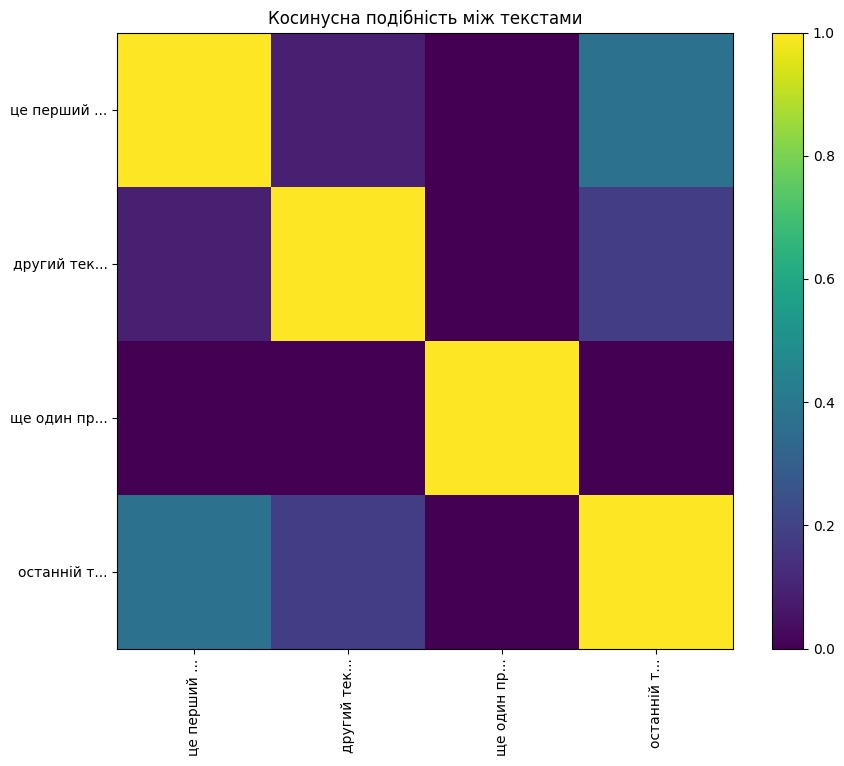

In [62]:
def get_texts():
    
    return [
        "Це перший текст для аналізу.",
        "Другий текст також потрібно обробити та порівняти.",
        "Ще один приклад тексту, який може бути проаналізований.",
        "Останній текст для завершення аналізу та візуалізації."
    ]


texts = get_texts()

texts_processed = process_texts(texts)
print("Оброблені тексти:", texts_processed)


visualize_texts(texts_processed)


cosine_matrix = calculate_tfidf(texts_processed)
print("Матриця косинусної подібності:\n", cosine_matrix)

visualize_data(cosine_matrix, texts_processed)
